## AUC

AUC là viết tắt của "Area Under the ROC Curve" trong tiếng Anh, dịch sang tiếng Việt là "Diện tích dưới đường cong ROC". Đây là một phép đo quan trọng trong đánh giá hiệu suất của mô hình phân loại (classifier) trong trường hợp binary classification (phân loại nhị phân).

Để hiểu AUC, hãy cùng nhau xem xét đến đường cong ROC (Receiver Operating Characteristic curve). ROC curve biểu diễn sự tương quan giữa tỷ lệ True Positive Rate (TPR) và tỷ lệ False Positive Rate (FPR) của mô hình phân loại, khi ngưỡng phân loại thay đổi từ 0 đến 1.

- True Positive Rate (TPR), còn gọi là Sensitivity hoặc Recall, đo lường tỷ lệ các trường hợp positive mà mô hình dự đoán chính xác.
- False Positive Rate (FPR) đo lường tỷ lệ các trường hợp negative bị phân loại sai (tức là dự đoán nhầm thành positive).

AUC là diện tích nằm dưới đường cong ROC và nó thể hiện khả năng của mô hình phân loại phân biệt giữa hai lớp positive và negative. AUC càng lớn thì mô hình càng có khả năng phân loại tốt hơn, với AUC = 1 thể hiện mô hình hoàn hảo, trong khi AUC = 0.5 chỉ ra mô hình không khác biệt so với một dự đoán ngẫu nhiên.

AUC là một phép đo định lượng và phổ biến trong đánh giá hiệu suất của các mô hình phân loại như Logistic Regression, Support Vector Machines (SVM), Random Forest, Neural Networks, và nhiều mô hình khác.

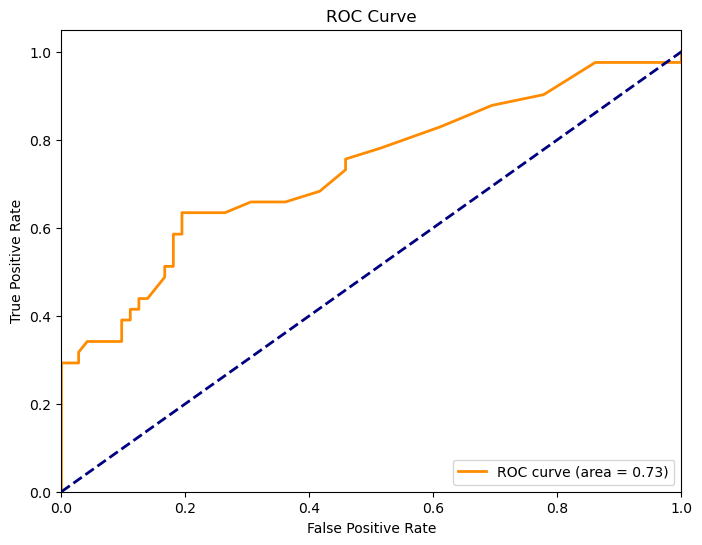

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
aSAH = pd.read_excel("aSAH.xlsx")

y_true_str = aSAH['outcome']
y_pred = aSAH['s100b']

# Create a dictionary to map string labels to binary labels
label_mapping = {"Poor": 1, "Good": 0}

# Map true labels to binary labels
y_true = [label_mapping[label] for label in y_true_str]

# Tính đường cong ROC và AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Liên hệ AUC và thống kê Mann-Whitney

1. Thống kê Mann-Whitney (U-test):

    Giả sử bạn có hai nhóm dữ liệu độc lập, $X$ và $Y$, với kích thước lần lượt là $n_x$ và $n_y$. Để tính U-statistic, bạn cần xếp hạng dữ liệu trong mỗi nhóm và tính tổng các xếp hạng trong nhóm $X$, ký hiệu là $R_X$. Sau đó, U-statistic được tính bằng công thức:

    $$ U = n_x \cdot n_y + \frac{n_x \cdot (n_x + 1)}{2} - R_X $$

1. Nếu $U$ là giá trị U-statistic (thống kê Mann-Whitney), thì AUC được tính như sau:

    $$ AUC = \frac{U - \frac{n_x \cdot (n_x + 1)}{2}}{n_x \cdot n_y} $$

1. DeLong's test:

    Giả sử bạn có hai mô hình phân loại và đã tính được các xác suất dự đoán của chúng trên tập dữ liệu kiểm tra. Để thực hiện kiểm định DeLong, bạn cần tính U-statistic và phương sai của U-statistic (Var(U)) như đã giải thích trước đó.

    Tiếp theo, để tính Z-score, bạn cần có AUC của hai mô hình ($AUC_1$ và $AUC_2$) và Var(U) như sau:

    $$ Z = \frac{AUC_1 - AUC_2}{\sqrt{\text{Var}(U)}} $$

    Sau đó, sử dụng Z-score để tính p-value, và nếu p-value nhỏ hơn mức ý nghĩa đã chọn (thường là 0.05), bạn có thể kết luận rằng có sự khác biệt đáng kể giữa AUC của hai mô hình.

1. Công thức tính khoảng tin cậy (confidence interval) cho AUC dựa trên phương pháp DeLong như sau:

    Giả sử bạn đã tính được U-statistic (U) và Var(U) từ kiểm định DeLong, thì khoảng tin cậy 95% cho AUC sẽ được tính bằng công thức sau:

    $$ \text{CI}_{\text{lower}} = AUC - z_{\alpha/2} \cdot \sqrt{\text{Var}(U)} $$

    $$ \text{CI}_{\text{upper}} = AUC + z_{\alpha/2} \cdot \sqrt{\text{Var}(U)} $$

    Trong đó:
    - AUC là diện tích dưới đường cong ROC đã tính từ mô hình phân loại và tập dữ liệu.
    - Var(U) là phương sai của U-statistic, tính từ kiểm định DeLong.
    - $z_{\alpha/2}$ là giá trị thống kê từ phân phối chuẩn tương ứng với mức đáng tin cậy 95%. Với mức đáng tin cậy 95%, $\alpha = 0.05$, nên $z_{\alpha/2}$ tương ứng với giá trị thống kê 1.96.


## Thuật toán Sun và Xu
Thuật toán được đề xuất bởi Sun và Xu trong bài báo "Fast Implementation of DeLong’s Algorithm for Comparing the Areas Under Correlated Receiver Operating Characteristic Curves" cung cấp một cách tính toán hiệu suất và nhanh chóng để tính phương sai của sự khác biệt giữa diện tích dưới đường cong ROC (AUC) bằng phương pháp DeLong cho các đường cong ROC tương quan. Thuật toán của họ giảm đáng kể độ phức tạp tính toán so với phương pháp DeLong gốc, làm cho nó phù hợp cho các tập dữ liệu lớn.

Dưới đây là tổng quan về các bước của thuật toán:

1. AUC được tính theo công thức

   $$AUC = \hat{\theta} = \frac{\sum_{i=1}^{m} R_i - \frac{m \cdot (m + 1)}{2}}{m \cdot n} = \frac{1}{mn} \sum_{i=1}^{m} \mathbb{T}_{Z}(X_{i}) - \frac{m+1}{2n}$$

   Trong đó:
      - m, n lần lượt là số lượng nhãn 1, 0
      - $R_i={T}_{Z}(X_{i})$ là giá trị score hoặc PD được sắp xếp theo thứ tự giảm dần (trường hợp bad = 1, good = 0). ${T}_{Z}(X_{i})$ được tính theo hàm Heaviside 
      - Hàm Heaviside $\mathcal{H}(t)$:

      $$ \mathcal{H}(t) = \begin{cases}1 & t > 0 \\ \frac{1}{2} & t = 0 \\ 0 & t < 0\end{cases} $$

      - Mối liên hệ giữa Mid-Ranks và Hàm Heaviside:

      $$ \mathbb{T}_{\mathcal{Z}}(\mathcal{Z}_{i}) = \sum_{j=1}^{M} \mathcal{H}(\mathcal{Z}_{i} - \mathcal{Z}_{j}) + \frac{1}{2} $$


1. **Tính Z-score và p-value**: Tính Z-score bằng cách sử dụng công thức:

   $$ z \triangleq \frac{\hat{\theta}^{(1)}-\hat{\theta}^{(2)}}{\sqrt{\mathbb{V}\left[\hat{\theta}^{(1)}-\hat{\theta}^{(2)}\right]}}=\frac{\hat{\theta}^{(1)}-\hat{\theta}^{(2)}}{\sqrt{\mathbb{V}\left[\hat{\theta}^{(1)}\right]+\mathbb{V}\left[\hat{\theta}^{(2)}\right]-2 \mathbb{C}\left[\hat{\theta}^{(1)}, \hat{\theta}^{(2)}\right]}} $$

   
   Trong đó: 
      1. $\hat{\theta}^{(1)}$ và $\hat{\theta}^{(2)}$: Đây là hai ước tính của tham số $\theta$ hay `AUC` trong hai mẫu khác nhau mà đang so sánh. 

      2. $\mathbb{V}\left[\hat{\theta}^{(1)}\right]$ và $\mathbb{V}\left[\hat{\theta}^{(2)}\right]$: Đây là phương sai của hai ước tính $\hat{\theta}^{(1)}$ và $\hat{\theta}^{(2)}$ tương ứng.

      3. $\mathbb{C}\left[\hat{\theta}^{(1)}, \hat{\theta}^{(2)}\right]$: Đây là hiệp phương sai giữa hai ước tính $\hat{\theta}^{(1)}$ và $\hat{\theta}^{(2)}$.

   Sau đó, tính giá trị p-value từ giá trị phân phối chuẩn Z-score.

1. **Kết quả**: Dựa vào giá trị p-value tính toán được và một ngưỡng ý nghĩa đã chọn (ví dụ, 0.05), bạn có thể xác định xem sự khác biệt trong AUC giữa hai mô hình có ý nghĩa thống kê hay không.


In [3]:
def midrank(x):
    J, Z = zip(*sorted(enumerate(x), key=lambda x:x[1]))
    J = list(J)
    Z = list(Z)
    Z.append(Z[-1]+1)
    N = len(x)
    T = np.zeros(N)

    i = 1
    while i <= N:
        a = i
        j = a
        while Z[j-1] == Z[a-1]:
            j = j + 1
        b = j - 1
        for k in range(a, b+1):
            T[k-1] = (a + b) / 2
        i = b + 1
    T2 = np.zeros(N)
    T2[J] = T

    return T2

def fastDeLong(samples):
    # %FASTDELONGCOV
    # %The fast version of DeLong's method for computing the covariance of
    # %unadjusted AUC.
    # %% Reference:
    # % @article{sun2014fast,
    # %   title={Fast Implementation of DeLong's Algorithm for Comparing the Areas Under Correlated Receiver Operating Characteristic Curves},
    # %   author={Xu Sun and Weichao Xu},
    # %   journal={IEEE Signal Processing Letters},
    # %   volume={21},
    # %   number={11},
    # %   pages={1389--1393},
    # %   year={2014},
    # %   publisher={IEEE}
    # % }
    # %% [aucs, delongcov] = fastDeLong(samples)
    # %%
    # % Edited by Xu Sun.
    # % Homepage: https://pamixsun.github.io
    # % Version: 2014/12
    # %%

    if np.sum(samples.spsizes) != samples.ratings.shape[1] or len(samples.spsizes) != 2:
        assert False, 'Argument mismatch error'

    z = samples.ratings    
    m, n = samples.spsizes
    x = z[:, :m]    
    y = z[:, m:]
    k = z.shape[0]

    tx = np.zeros([k, m])
    ty = np.zeros([k, n])
    tz = np.zeros([k, m + n])
    for r in range(k):
        tx[r, :] = midrank(x[r, :])
        ty[r, :] = midrank(y[r, :])
        tz[r, :] = midrank(z[r, :])

    aucs = np.sum(tz[:, :m], axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n

    return aucs, delongcov, v01, v10

In [4]:
class Samples:
    def __init__(self, y_true, y_score1, y_score2):         
        n_samples = len(y_true)
        m = int(sum(y_true))
        n = n_samples - m

        # Zip the lists together
        zipped_data = list(zip(y_true, y_score1, y_score2))

        # Sort the zipped data based on labels in decreasing order
        sorted_data = sorted(zipped_data, key=lambda x: x[0], reverse=True)

        # Unzip the sorted data to get separate sorted values and labels
        sorted_y_true, sorted_y_score1, sorted_y_score2 = zip(*sorted_data)
    
        # Stack the sorted scores into a ratings matrix
        ratings = np.vstack((sorted_y_score1, sorted_y_score2))
        
        # Create a tuple with the sample sizes
        spsizes = (m, n)
        
        self.ratings = ratings
        self.spsizes = spsizes
        
import numpy as np
import pandas as pd
aSAH = pd.read_excel("aSAH.xlsx")

y_true_str = aSAH['outcome']
y_pred1 = aSAH['s100b']
y_pred2 = aSAH['wfns']

# Create a dictionary to map string labels to binary labels
label_mapping = {"Poor": 1, "Good": 0}

# Map true labels to binary labels
y_true = [label_mapping[label] for label in y_true_str]

samples = Samples(y_true, y_pred1, y_pred2)

aucs, delongcov, v01, v10 = fastDeLong(samples)
# Print the results
print("AUCs:", aucs)
print("DeLong Covariance:", delongcov)

AUCs: [0.73136856 0.82367886]
DeLong Covariance: [[0.00266868 0.00119616]
 [0.00119616 0.00146991]]


### Kiểm định sự khác biệt AUC của 2 mô hình theo Delong

In [39]:
import scipy
def calpvalue(aucs, sigma):
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    pvalue = 2 * (1 - scipy.stats.norm.cdf(z, loc=0, scale=1))
    return pvalue

AUC_DS, C, _, _ = fastDeLong(samples)
p_value = calpvalue(AUC_DS, C)[0][0]

print(f"AUC Model 1: {AUC_DS[0]:.3f}")
print(f"AUC Model 2: {AUC_DS[1]:.3f}")
print("P-value for DeLong test:", p_value)
# So sánh AUC của hai mô hình
alpha = 0.05
if p_value < alpha:
    print("Có sự khác biệt đáng kể giữa AUC của hai mô hình.")
else:
    print("Không có sự khác biệt đáng kể giữa AUC của hai mô hình.")


AUC Model 1: 0.731
AUC Model 2: 0.824
P-value for DeLong test: 0.02717578222918804
Có sự khác biệt đáng kể giữa AUC của hai mô hình.


## So sánh AUC của hai mô hình bằng bootstrap

In [44]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Tạo dữ liệu mẫu với độ dài chuỗi y_true là 1000
# Tính AUC cho hai mô hình
auc_model1 = roc_auc_score(y_true, predictions_model1)
auc_model2 = roc_auc_score(y_true, predictions_model2)

# Thực hiện bootstrap để tính khoảng tin cậy 95% cho AUC của cả hai mô hình
n_iterations = 1000  # Số lượng lần lấy mẫu bootstrap
n_size = len(y_true)  # Số lượng phần tử trong chuỗi y_true

auc_scores_model1 = []
auc_scores_model2 = []

for _ in range(n_iterations):
    # Lấy ngẫu nhiên mẫu từ dữ liệu với replacement
    indices = np.random.randint(0, n_size, n_size)
    y_true_bootstrap = np.array(y_true)[indices]
    y_pred_bootstrap_model1 = predictions_model1[indices]
    y_pred_bootstrap_model2 = predictions_model2[indices]
    
    # Tính AUC cho mẫu lấy ra từ dữ liệu bootstrap cho hai mô hình
    auc_score_model1 = roc_auc_score(y_true_bootstrap, y_pred_bootstrap_model1)
    auc_score_model2 = roc_auc_score(y_true_bootstrap, y_pred_bootstrap_model2)
    
    auc_scores_model1.append(auc_score_model1)
    auc_scores_model2.append(auc_score_model2)

# Tính khoảng tin cậy 95% cho AUC cho cả hai mô hình
lower_bound_model1 = np.percentile(auc_scores_model1, 2.5)
upper_bound_model1 = np.percentile(auc_scores_model1, 97.5)

lower_bound_model2 = np.percentile(auc_scores_model2, 2.5)
upper_bound_model2 = np.percentile(auc_scores_model2, 97.5)

print(f"AUC Model 1: {auc_model1:.3f} (95% CI: [{lower_bound_model1:.3f}, {upper_bound_model1:.3f}])")
print(f"AUC Model 2: {auc_model2:.3f} (95% CI: [{lower_bound_model2:.3f}, {upper_bound_model2:.3f}])")

# So sánh khoảng tin cậy của AUC của hai mô hình
if lower_bound_model1 > upper_bound_model2 or lower_bound_model2 > upper_bound_model1:
    print("Có sự khác biệt đáng kể giữa AUC của hai mô hình.")
else:
    print("Không có sự khác biệt đáng kể giữa AUC của hai mô hình.")


AUC Model 1: 0.523 (95% CI: [0.403, 0.638])
AUC Model 2: 0.506 (95% CI: [0.383, 0.613])
Không có sự khác biệt đáng kể giữa AUC của hai mô hình.


## Tính khoảng tin cậy AUC sử dụng phương pháp `Delong`

In [5]:
from scipy.stats import norm
def calculate_auc_ci(y_true, y_score, alpha = 0.05):
    samples = Samples(y_true, y_score, y_score)    

    auc, auc_cov,_,_ = fastDeLong(samples)
    auc = auc[0]
    var_U = auc_cov[0,0]    
    
    z_score = norm.ppf(1 - alpha / 2)
    lower_bound = auc - z_score * np.sqrt(var_U)
    upper_bound = auc + z_score * np.sqrt(var_U)
  
    return auc, var_U, lower_bound, upper_bound

auc_model, _, lower_bound, upper_bound = calculate_auc_ci(y_true, y_pred)
print(f"AUC: {auc_model:.3f}")
print(f"95% Confidence Interval for AUC using bootstrap method: [{lower_bound:.3f}, {upper_bound:.3f}]")

AUC: 0.731
95% Confidence Interval for AUC using bootstrap method: [0.630, 0.833]


## Tính khoảng tin cậy AUC sử dụng phương pháp `Bootstrap`

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# Tính AUC cho mô hình ban đầu
auc_model = roc_auc_score(y_true, y_pred)

# Số lượng lần lấy mẫu (bootstrap iterations)
n_iterations = 1000

# Số lượng mẫu lấy ra từ dữ liệu ban đầu trong mỗi lần lấy mẫu
n_size = len(y_true)

# Tạo mảng để lưu kết quả AUC từ các lần lấy mẫu
auc_scores = []

for _ in range(n_iterations):
    # Lấy ngẫu nhiên mẫu từ dữ liệu với replacement
    indices = np.random.randint(0, n_size, n_size)
    y_true_bootstrap = np.array(y_true)[indices]
    y_pred_bootstrap = y_pred[indices]
    
    # Tính AUC cho mẫu lấy ra từ dữ liệu bootstrap
    auc_score = roc_auc_score(y_true_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_score)

# Tính khoảng tin cậy 95% cho AUC
lower_bound = np.percentile(auc_scores, 2.5)
upper_bound = np.percentile(auc_scores, 97.5)

print(f"AUC: {auc_model:.3f}")
print(f"95% Confidence Interval for AUC using bootstrap method: [{lower_bound:.3f}, {upper_bound:.3f}]")

AUC: 0.731
95% Confidence Interval for AUC using bootstrap method: [0.624, 0.824]
